In [ ]:
%%capture
!pip install mne

In [ ]:
#To read data of game G1
import pandas as pd
import os
data1=pd.read_csv('/content/S01G1AllChannels.csv.zip')
data1.drop('Unnamed: 14',axis=1,inplace=True)
data1.head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
0,-33.0205,-15.1846,-42.1795,1.6872,42.1793,-1.68720,-5.5436,-3.6154,25.7899,-9.88190,5.5436,7.47180,11.8101,17.1128
1,-28.6291,-20.0583,-42.5410,-10.4653,35.3100,-15.68600,-19.3110,-2.4344,17.4933,3.24420,18.7081,5.09510,17.3683,3.0708
2,-21.8497,-10.9006,-32.0346,-2.3656,39.6993,-0.64483,-4.0523,-1.0830,26.8081,-3.45840,8.1861,8.40480,15.1209,9.3940
3,-25.1185,-10.9702,-32.7641,-3.4287,32.7378,4.69650,-8.6299,-1.7412,16.7637,-9.75860,1.1868,0.91086,4.3315,8.1073
4,-19.0316,-9.5886,-29.1108,-3.9459,35.3533,0.79929,-12.6914,1.0144,13.1068,-0.73692,8.1054,-1.31300,8.1694,8.3442


In [ ]:
#To read data of game G2
import pandas as pd
import os
data2=pd.read_csv('/content/S01G2AllChannels.csv.zip')
data2.drop('Unnamed: 14',axis=1,inplace=True)
data2.head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
0,46.5180,9.3999,48.4461,-38.8052,-28.2001,-55.194800,-69.1743,-8.4360,-3.1334,41.6972,131.8409,51.3382,3.1334,-29.6461
1,40.8347,22.9359,59.6394,-22.3769,-12.4081,-37.783100,-50.9239,-12.2683,11.1546,25.0954,112.8435,44.4019,-3.3213,-13.7674
2,24.2846,35.6597,56.1814,-6.9343,2.4364,-21.416100,-36.1787,-25.6322,24.5854,9.4897,91.9729,27.6378,-17.2220,-8.4824
3,8.7275,33.5203,59.0775,4.0870,-1.0841,-6.031200,-36.9003,-38.1943,37.2102,-5.1797,72.3545,22.0026,-30.2887,3.1138
4,16.8805,18.9758,56.0150,5.2878,-1.0189,-0.005093,-20.5862,-49.8819,49.0776,-18.9689,61.2644,29.3593,-26.0612,1.4809


In [ ]:
from glob import glob
import scipy.io
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
def convertmat2mne(data):
    ch_names=['AF3','AF4','F3','F4','F7','F8','FC5','FC6','O1','O2','P7','P8','T7','T8']
    ch_types = ['eeg'] *len(data.columns)
    sampling_freq=128
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    info.set_montage('standard_1020')
    data=mne.io.RawArray(data.T, info)
    data.set_eeg_reference()
    data.filter(l_freq=13,h_freq=45)
    #duration=3,overlap=1
    return data.get_data()

In [ ]:
%%capture
!pip install git+https://github.com/OverLordGoldDragon/ssqueezepy

In [ ]:
#for G1
test1=convertmat2mne(data1)

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 131 samples (1.023 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished


In [ ]:
#for G2
test2=convertmat2mne(data2)

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 131 samples (1.023 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


In [ ]:
from glob import glob
import scipy.io
import numpy as np
import ssqueezepy
from ssqueezepy import stft
from ssqueezepy.visuals import plot, imshow
import os
import pandas as pd
from scipy import signal
from scipy.signal import spectrogram

In [ ]:

myparams = dict(nperseg = 60 , noverlap =1, return_onesided=False, scaling='spectrum')
f, t, Sxx = scipy.signal.stft(test1, fs =128 , **myparams)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


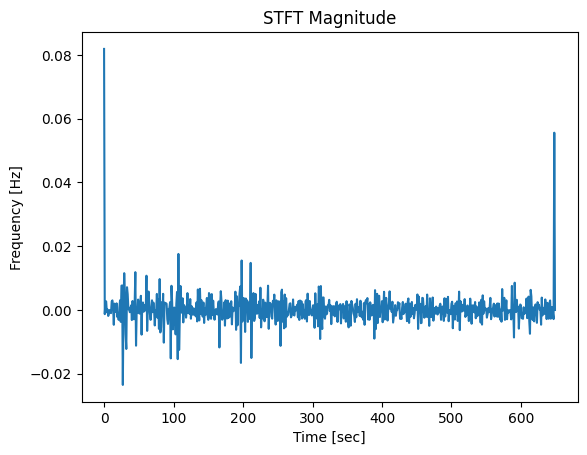

In [ ]:
plt.plot(Sxx[1][1])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

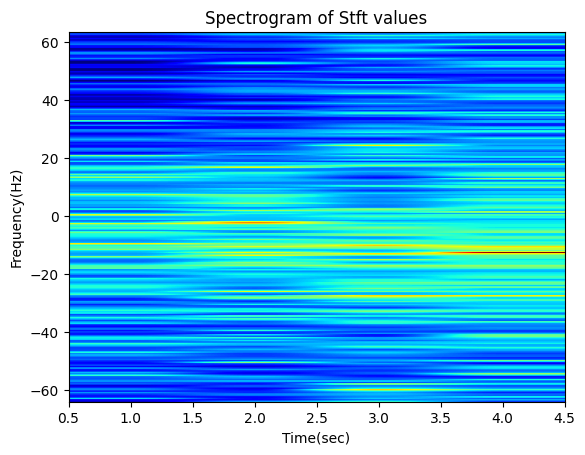

In [ ]:

plt.specgram(Sxx[1][1], Fs=128, cmap="jet_r")
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.title('Spectrogram of Stft values')
#plt.savefig('first.jpg')
plt.show()

In [ ]:
from ssqueezepy.visuals import plot , imshow

In [ ]:
!mkdir boring_not_boring


In [ ]:
%%capture
channel,Window=[],[]
for k in range(0,4):
  for i in range(0,30):
   path=os.path.join('boring_not_boring/',f'yes/')
   os.makedirs(path,exist_ok=True)
   plt.specgram(Sxx[k][i], Fs=128, cmap="jet_r")
   plt.xlabel('Time(sec)')
   plt.ylabel('Frequency(Hz)')
   img_name='G1S01ch'+str(int(k))+'W'+str(int(i))
   path=path+f'{img_name}.jpg'
   
   plt.savefig(path)
        
   channel.append(k)
   Window.append(i)

In [ ]:
myparams = dict(nperseg = 60 , noverlap =1, return_onesided=False, scaling='spectrum')
f, t, Zxx = scipy.signal.stft(test2, fs =128 , **myparams)

In [ ]:
%%capture
channel,Window=[],[]
for k in range(0,4):
  for i in range(0,30):
   path=os.path.join('boring_not_boring/',f'no/')
   os.makedirs(path,exist_ok=True)
   plt.specgram(Zxx[k][i], Fs=128, cmap="jet_r")
   plt.xlabel('Time(sec)')
   plt.ylabel('Frequency(Hz)')
   img_name='G2S01ch'+str(int(k))+'W'+str(int(i))
   path=path+f'{img_name}.jpg'
   
   plt.savefig(path)
        
   channel.append(k)
   Window.append(i)

In [ ]:
%%capture
!pip install tensorflow_addons

In [ ]:
%%capture
!pip install visualkeras
import os
import warnings
import itertools
import cv2
import seaborn as sns
import pandas as pd
import numpy  as np
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

import tensorflow as tf
import tensorflow_addons as tfa
import visualkeras
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import load_img, img_to_array



warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# General parameters
epochs = 15
pic_size = 299
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
folder_path = "/content/boring_not_boring"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')
dataset=[]
lab=[]

for image_name in no_images:
    image=cv2.imread(folder_path + '/no/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((299,299))
    dataset.append(np.array(image))
    lab.append(0)
for image_name in yes_images:
    image=cv2.imread(folder_path + '/yes/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((299,299))
    dataset.append(np.array(image))
    lab.append(1)

   

In [ ]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(240, 299, 299, 3) (240,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
%%capture 
!pip install tf-explain

In [ ]:

import cv2
import tensorflow as tf
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions 


In [ ]:
#load pre trained Xception model
base_model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=False,input_shape=(299,299, 3))


In [ ]:
base_model.trainable = False 

In [ ]:
#%%capture
base_model.summary()  #Trainable parameters will be 0

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
from keras.optimizers import Adam, RMSprop



In [ ]:


flatten_layer = layers.Flatten()
dense_layer_2 =  layers.Dense(50, activation='relu'),
prediction_layer = layers.Dense(1, activation='sigmoid')
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_2,
    prediction_layer
])



TypeError: ignored

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.0, 1: 1.0}

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [ ]:
# Fit the Model
model.fit(x_train,y_train,epochs = 10, 
          class_weight=class_weights, 
          validation_data=(x_test, y_test),verbose=1,callbacks=[es])

print("Fitting the model completed.")

Epoch 1/10
6/6 [==============================] - 18s 957ms/step - loss: 49.7105 - accuracy: 0.4792 - val_loss: 26.1453 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 2s 272ms/step - loss: 11.9347 - accuracy: 0.5469 - val_loss: 13.2888 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 2s 357ms/step - loss: 7.2119 - accuracy: 0.5521 - val_loss: 6.5210 - val_accuracy: 0.5625
Epoch 4/10
6/6 [==============================] - 2s 337ms/step - loss: 6.8606 - accuracy: 0.5469 - val_loss: 15.4416 - val_accuracy: 0.5208
Epoch 5/10
6/6 [==============================] - 2s 338ms/step - loss: 13.4071 - accuracy: 0.5156 - val_loss: 8.0771 - val_accuracy: 0.4792
Epoch 6/10
6/6 [==============================] - 2s 274ms/step - loss: 10.9353 - accuracy: 0.4896 - val_loss: 13.3771 - val_accuracy: 0.4792
Epoch 7/10
6/6 [==============================] - 2s 272ms/step - loss: 6.9151 - accuracy: 0.5104 - val_loss: 9.0119 - val_accuracy: 0.4167
Epoch 8/10


In [ ]:
#Finding Test Accuracy :
loss,accuracy=model.evaluate(x_test,y_test)
print('Test accuracy:',accuracy)

2/2 [==============================] - 1s 140ms/step - loss: 6.5210 - accuracy: 0.5625
Test accuracy: 0.5625


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import backend as K

#load pre trained Xception model
base_model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=False,input_shape=(299,299, 3))


# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create a new model with the VGG16 base and global average pooling layer
model = Model(inputs=base_model.input, outputs=x)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.2, random_state=42)



# Extract VGG16 features for the training and testing sets
x_train = model.predict(x_train)
x_test = model.predict(x_test)


# Train an SVM classifier on the VGG16 features
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Evaluate the SVM classifier on the testing set
accuracy = svm.score(x_test, y_test)
print("Accuracy:", accuracy)

2/2 [==============================] - 1s 192ms/step
Accuracy: 0.5
